In [17]:
import connect_to_db as cn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [153]:
result_count_list = []

sql = f"select count(*) from comments where is_valid=1 and is_valid_author=1;"
result_df = cn.select_query_result_to_df(sql)
denominator = int(result_df['count(*)'][0])

for is_score in range(1, 4):
    part_count_list = []
    part_percentage_list = []
    for es_score in range(1, 4):
        sql = f"select count(*) from comments where is_valid=1 and is_valid_author=1 and is_score={is_score} and es_score={es_score};"
        result_df = cn.select_query_result_to_df(sql)
        count = int(result_df['count(*)'][0])
        part_count_list.append(count)

    result_count_list.append(part_count_list)
    
print(result_count_list)

[[799177, 1145393, 667235], [381103, 328249, 250524], [178278, 66726, 42810]]


In [161]:
result_df = pd.DataFrame(result_count_list)
result_df = result_df.rename(columns={0: 'ES score 1'}, index={0: 'IS score 1'})
result_df = result_df.rename(columns={1: 'ES score 2'}, index={1: 'IS score 2'})
result_df = result_df.rename(columns={2: 'ES score 3'}, index={2: 'IS score 3'})
print(result_df)

            ES score 1  ES score 2  ES score 3
IS score 1      799177     1145393      667235
IS score 2      381103      328249      250524
IS score 3      178278       66726       42810


In [162]:
count_label = np.array(result_count_list).reshape(-1)
percentage_label = ["{0:.2%}".format(value) for value in count_label / denominator]

In [167]:
def draw_heatmap(df, title):
    filename = title + '.png'
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(count_label, percentage_label)]

    print(labels)
    labels = np.asarray(labels).reshape(3, 3)
    
    sns.set(font_scale=1.2)
    sns.heatmap(df, annot=labels, fmt='', cmap='Reds', square=True, annot_kws = {'size':14})
    # plt.title(title, fontsize=16)
    
    plt.savefig(filename, dpi=300)
    plt.figure(figsize = (12,6))
    
    plt.show()

['799177\n20.71%', '1145393\n29.68%', '667235\n17.29%', '381103\n9.87%', '328249\n8.50%', '250524\n6.49%', '178278\n4.62%', '66726\n1.73%', '42810\n1.11%']


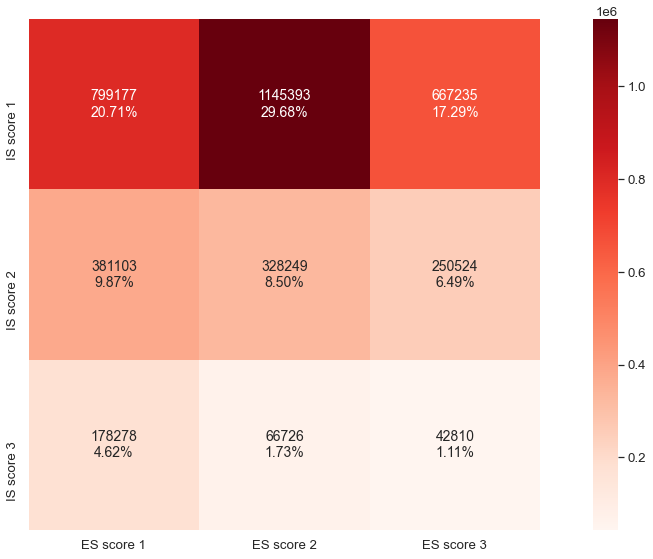

<Figure size 864x432 with 0 Axes>

In [168]:
draw_heatmap(result_df, "Heatmap of Portion of IS, ES scores")